In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [2]:
#onecall = True  # 8 days
onecall = False # 5 days

In [3]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [4]:
onecall = False

In [5]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [6]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1734901200, 'main': {'temp': 5.74, 'feels_like': 1.51, 'temp_min': 5.74, 'temp_max': 7.13, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 1003, 'humidity': 80, 'temp_kf': -1.39}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 83}, 'wind': {'speed': 6.88, 'deg': 302, 'gust': 14.19}, 'visibility': 10000, 'pop': 0.92, 'rain': {'3h': 0.46}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-12-22 21:00:00'}, {'dt': 1734912000, 'main': {'temp': 5.96, 'feels_like': 1.65, 'temp_min': 5.96, 'temp_max': 6.41, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 1005, 'humidity': 74, 'temp_kf': -0.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 87}, 'wind': {'speed': 7.29, 'deg': 310, 'gust': 15.18}, 'visibility': 10000, 'pop': 0.21, 'sys': {'pod': 'n'}, 'dt_txt': '2024-12-23 00:00:00'}, {'dt': 1734922800, 'm

In [7]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1734901200
main          {'temp': 5.74, 'feels_like': 1.51, 'temp_min':...
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                              {'all': 83}
wind                 {'speed': 6.88, 'deg': 302, 'gust': 14.19}
visibility                                                10000
pop                                                        0.92
rain                                               {'3h': 0.46}
sys                                                {'pod': 'n'}
dt_txt                                      2024-12-22 21:00:00
Name: 0, dtype: object


In [8]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [9]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   22/12 22:00  22:00      7.13      5.74
1   23/12 01:00  01:00      6.41      5.96
2   23/12 04:00  04:00      5.66      5.66
3   23/12 07:00  07:00      5.58      5.58
4   23/12 10:00  10:00      5.99      5.99
5   23/12 13:00  13:00      6.58      6.58
6   23/12 16:00  16:00      6.79      6.79
7   23/12 19:00  19:00      5.85      5.85
8   23/12 22:00  22:00      6.01      6.01
9   24/12 01:00  01:00      5.67      5.67
10  24/12 04:00  04:00      5.53      5.53
11  24/12 07:00  07:00      5.71      5.71
12  24/12 10:00  10:00      5.95      5.95
13  24/12 13:00  13:00      6.37      6.37
14  24/12 16:00  16:00      6.59      6.59
15  24/12 19:00  19:00      6.78      6.78
16  24/12 22:00  22:00      6.81      6.81
17  25/12 01:00  01:00      6.99      6.99
18  25/12 04:00  04:00      6.71      6.71
19  25/12 07:00  07:00      5.69      5.69
20  25/12 10:00  10:00      5.93      5.93
21  25/12 13:00  13:00      8.23      8.23
22  25/12 1

In [10]:
_5days['human_date']

0     22/12 22:00
1     23/12 01:00
2     23/12 04:00
3     23/12 07:00
4     23/12 10:00
5     23/12 13:00
6     23/12 16:00
7     23/12 19:00
8     23/12 22:00
9     24/12 01:00
10    24/12 04:00
11    24/12 07:00
12    24/12 10:00
13    24/12 13:00
14    24/12 16:00
15    24/12 19:00
16    24/12 22:00
17    25/12 01:00
18    25/12 04:00
19    25/12 07:00
20    25/12 10:00
21    25/12 13:00
22    25/12 16:00
23    25/12 19:00
24    25/12 22:00
25    26/12 01:00
26    26/12 04:00
27    26/12 07:00
28    26/12 10:00
29    26/12 13:00
30    26/12 16:00
31    26/12 19:00
32    26/12 22:00
33    27/12 01:00
34    27/12 04:00
35    27/12 07:00
36    27/12 10:00
37    27/12 13:00
38    27/12 16:00
39    27/12 19:00
Name: human_date, dtype: object

In [39]:
xticks= list(_5days['time'])
xticks

['22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00']

In [21]:
# plot
start = _5days['time'][0]
start

'22:00'

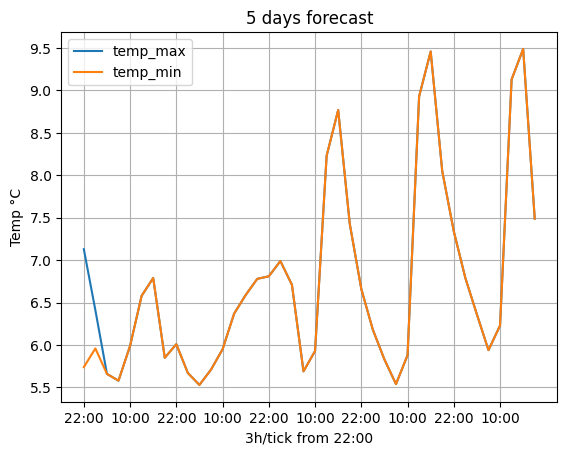

In [61]:
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel(f'3h/tick from {start}')
plt.xticks(ticks=np.arange(0,40,4), labels=xticks[::4])
plt.grid()
plt.show()
    

In [60]:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
# locs, labels = plt.xticks()

In [12]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

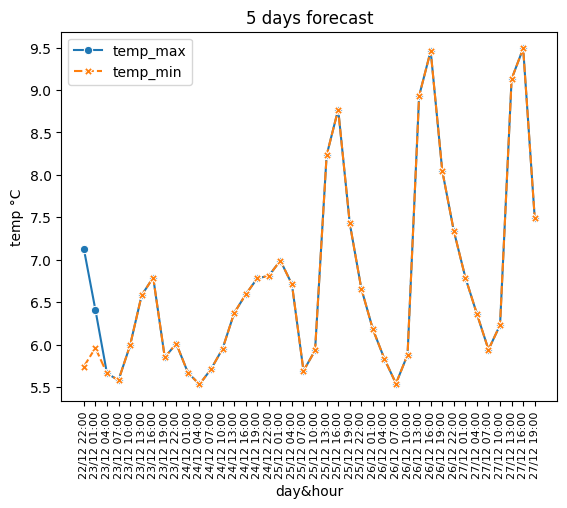

In [ ]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 

# set index to be used as labels for x-axis
df1 = df1.set_index('human_date')
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

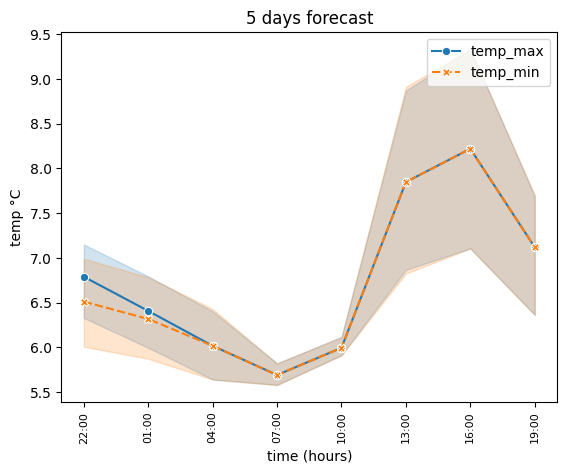

In [14]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 

In [15]:
df2

,temp_max,temp_min
time,,
22:00,7.13,5.74
01:00,6.41,5.96
04:00,5.66,5.66
07:00,5.58,5.58
10:00,5.99,5.99
13:00,6.58,6.58
16:00,6.79,6.79
19:00,5.85,5.85
22:00,6.01,6.01


In [16]:
df2_grp = df2.groupby('time')

In [ ]:
for k in df2_grp:
    print(k[1]['temp_max'], type(k[1]))
    

time
01:00    6.41
01:00    5.67
01:00    6.99
01:00    6.18
01:00    6.79
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
04:00    5.66
04:00    5.53
04:00    6.71
04:00    5.83
04:00    6.36
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
07:00    5.58
07:00    5.71
07:00    5.69
07:00    5.54
07:00    5.94
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
10:00    5.99
10:00    5.95
10:00    5.93
10:00    5.88
10:00    6.23
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
13:00    6.58
13:00    6.37
13:00    8.23
13:00    8.93
13:00    9.13
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
16:00    6.79
16:00    6.59
16:00    8.77
16:00    9.46
16:00    9.49
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
19:00    5.85
19:00    6.78
19:00    7.43
19:00    8.05
19:00    7.49
Name: temp_max, dtype: float64 <class 'pandas.core.frame.Data

time
01:00    Axes(0.125,0.11;0.775x0.77)
04:00    Axes(0.125,0.11;0.775x0.77)
07:00    Axes(0.125,0.11;0.775x0.77)
10:00    Axes(0.125,0.11;0.775x0.77)
13:00    Axes(0.125,0.11;0.775x0.77)
16:00    Axes(0.125,0.11;0.775x0.77)
19:00    Axes(0.125,0.11;0.775x0.77)
22:00    Axes(0.125,0.11;0.775x0.77)
dtype: object

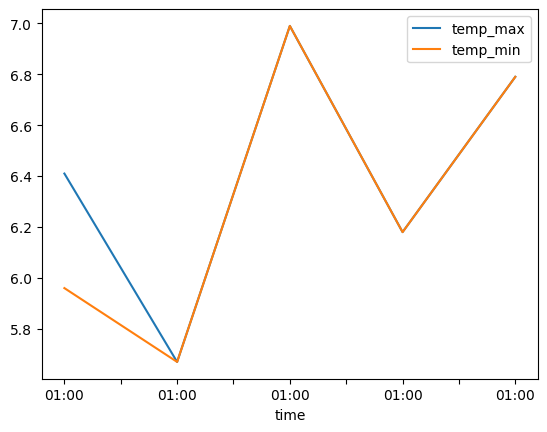

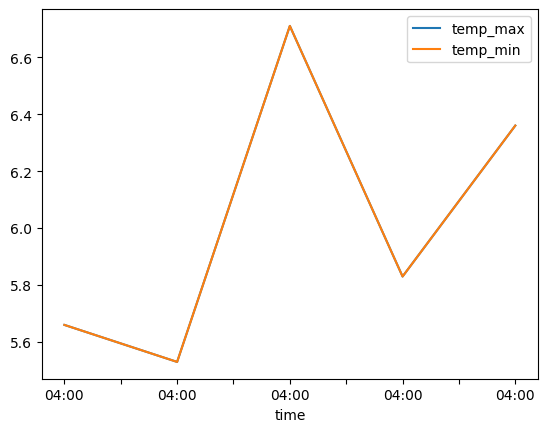

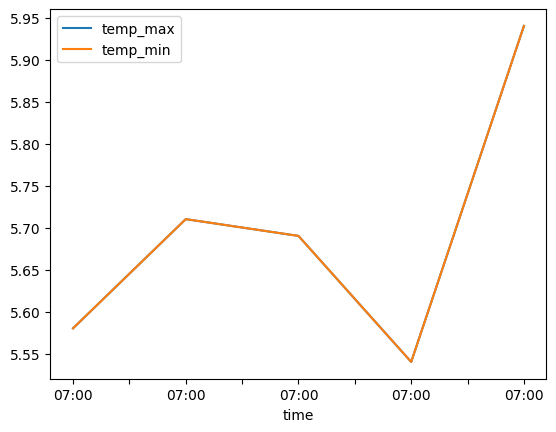

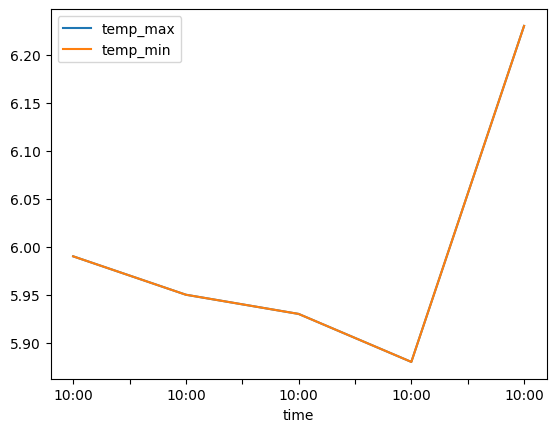

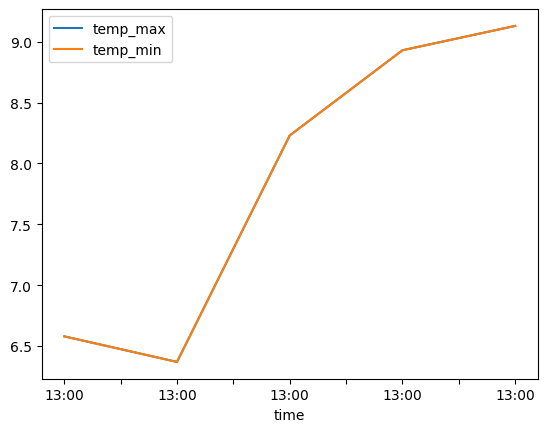

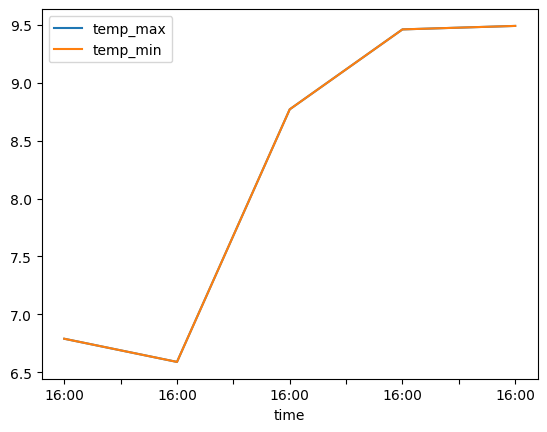

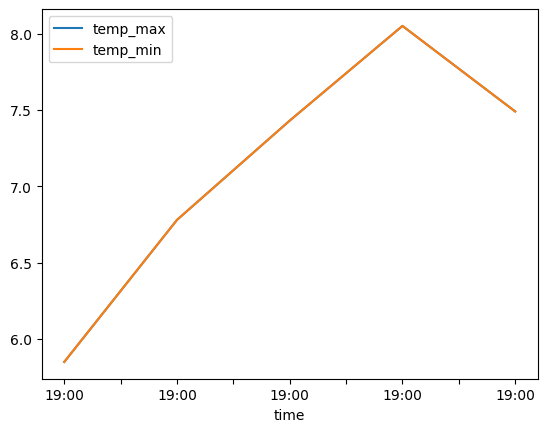

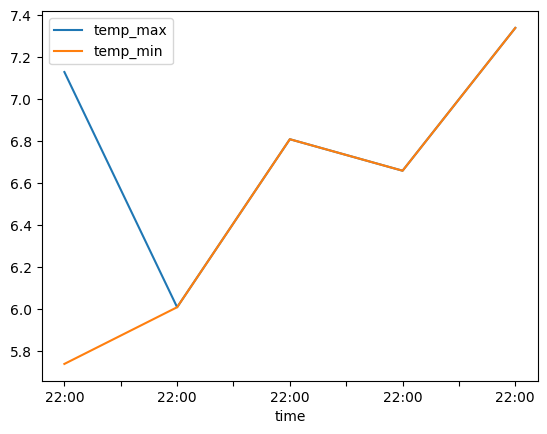

In [18]:
df2_grp.plot()